# Classic Perceptron Learning Algorithm

## Supervised Learning

### The perceptron is an example of supervised learning which uses labelled data for the purpose of **classification.**  Other algorithms could be used for unsupervised learning.  Another application of machine learning besides classification is prediction.

### The goal of classification is to be able to use enough existing data points to accurately determine which class a new data point should belong to.


![classify](classify.png)

### The decision boundary is where the classes are separated.  When this is a straight line, the classes are linearly separable.

### The mathematical definition of being linearly seperable starts by defining two points $X_0$ and $X_1$ which exist in $n$ dimensional Eclidean space.  If we define $n+1$ real numbers as $w_1,w_2,w_n,k$ such that evern point $x \in X_o$ that satisfies $\sum_{i=1}^{n}w_ix_i>k$ and every point $x \in X_1$ satisfies $\sum_{i=1}^n w_i x_i < k$ where $x_i$ is the $i$th component of $x$.

### The perceptron learning algorithm is a method to find such a decision boundary given an adequate amount of correctly labeled data points.

![perceptron](perceptron.png)

### The perceptron takes in a sum of weighted inputs and passes the result to an activation function.  The output of the activation function is our **binary** classification.

### To demonstrate the perceptron learning algorithm, we will need a sample data set and so will use the Iris dataset from the RDatasets package

In [35]:
using RDatasets                                 # RDatasets is a package that allows us to import dataframes that usually come with R                                          
using Plots                                     # the Plots package is included so that we can visualize our data

iris = dataset("datasets","iris")               # The dataset function comes from the package RDatasets and we use this function to bring in the iris data and save it to the variable iris
head(iris,8)                                    # Print the top 8 rows to match the sample from the paper

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa


### The iris dataset is sourced from a 1936 paper by R. A. Fisher that was published in the journal ***Annals of Eugenics*** titled "The use of multiple measurements in taxonomic problems".  The full paper can be found at: 
https://digital.library.adelaide.edu.au/dspace/bitstream/2440/15227/1/138.pdf

### The data was collected by Dr. Edgar Anderson, who collected the majority of the data at the Gaspé Peninsula.
![dataset](dataset.png)

### The dataframe contains four measurements (*in centimetres*) from four species of the Iris flower.  The three species are *Iris setosa*, *Iris versicolor* and *Iris virginica*.  The four measurements are the Sepal length, Sepal width, Petal length and petal width.
![iris](iris.png)

### Using these measurements, we are confident to be able to create a decision boundary based on the just the Sepal Length and Sepal Width to classify a data point as an *Iris setosa* or an *Iris versicolor*.  The measurements are called **features**.

In [36]:
x_data = [x for x in zip(iris.SepalLength[1:100], iris.SepalWidth[1:100])]    # zip returns an array of tuples from multiple iterable ojects
typeof(x_data)

Array{Tuple{Float64,Float64},1}

### The first 100 elements are all the measurements of the Setosa and Versicolor.  The first 50 are setosa and the second 50 is Versicolor.  The two columns SepalLength and SepalWidth are extracted for our x_data array.

### To obtain the classifications, the species name, we create a similar array called y_data which is the labels for the data

In [37]:
y_data = [x for x in iris.Species[1:100]]

100-element CategoricalArray{String,1,UInt8}:
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 "setosa"
 ⋮
 "versicolor"
 "versicolor"
 "versicolor"
 "versicolor"
 "versicolor"
 "versicolor"
 "versicolor"
 "versicolor"
 "versicolor"
 "versicolor"
 "versicolor"
 "versicolor"

### The perceptron learning algorithm will need a numerical input and so we will have to use **One-hot encoding** to modify our y_data where +1 will indicate a setosa and -1 will indicate a Versicolor.

In [38]:
# the comparison will return a 1 for true and 0 for false and then create an array that will overwrite the y_data array
y_data = [i == "setosa" ? 1 : -1 for i in y_data]       

100-element Array{Int64,1}:
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  ⋮
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1

### To test separability, a scatter plot can be helpful.

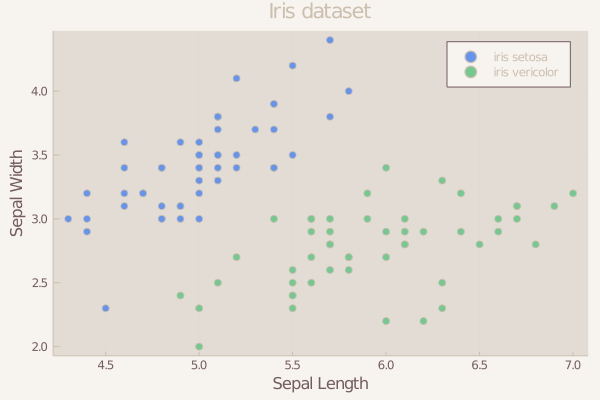

In [39]:
theme(:sand)                               # control the colors of the plot
scatter(x_data[1:50],                         # plot the setosa datapoints and give them a label in the legend
        label = "iris setosa",
        xaxis = "Sepal Length",
        yaxis = "Sepal Width",
        title = "Iris dataset")

scatter!(x_data[51:100],                      # use the ! to add to the plot the second 50 points of the versicolor
        label = "iris vericolor")

The $x$ vector is the are the two features, the Sepal Width and Length
$$ x=\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} $$

The w vector has weights for the two features and one for the bias
$$ w = \begin{bmatrix} w_1 \\ w_2 \\ w_3 \end{bmatrix} $$

Modify the x matrix to $\hat{x}$ to include a third term for the bias
$$ \hat{x} = \begin{bmatrix} x_1 \\ x_2 \\ 1 \end{bmatrix} $$

The result of the matrix multiplication is $\hat{y}$
$$ \hat{y} \in \{1,-1\} \Leftarrow sign (w^\intercal \hat{x}) $$

In [40]:
"""
    sign(w,x)

sign function returns 1 if the the transposed weight vector
times xhat is gerater than 0 and -1 if not
# Arguments
- `w::1d array`: 3 element weight vector with the bias weight as the third term.
- `x::1d array`: 2 element feature vector with the length and width measurements
"""
function sign(w,x)
    xhat = [x[1],x[2],1]          # pull the elements from input x and add a 1 for the bias
    return w'xhat > 0 ? 1 : -1    # the function will return a 1 if w transpose times xhat is greater than 0 or a -1 if not
    end                            # functions in Julia require an end statement

sign

In [41]:
"""
    perceptron_update(w,x,y)

update the weights if a prediction error is observed
# Arguments
- `w::1d array`: 3 element weight vector with the bias weight as the third term.
- `x::1d array`: 2 element feature vector with the length and width measurements
- `y::1d array`: 1 element feature vector with the labeled output
"""
function perceptron_update(w,x,y)
    xhat = [x[1],x[2],1.0]       # add a 1 to the x vector to account for the bias term
    if sign(w,x) != y            # compare the output of the sign function to the known label
        w += y*[x[1],x[2],1.0]
        #w += w*xhat             # if the sign function failed to meet a correct prediction, update the weights by adding to the weights
    end
    return w
end        

perceptron_update

In [42]:
"""
    error(w,features,labels)

return the total number of missclassifcations by the perceptron
# Arguments
- `w::1d array`       : current weight vector
- `features::2d array`: length and width measurements
- `lables::1d array`  : the labeled output
"""
function error(w,features,labels)
    return sum([sign(w, features[i]) != labels[i] ? 1 : 0 for i = 1:length(labels)]) # if the classification is incorrect add a 1 to the sum, iterate over all data
end

error

In [43]:
"""
    perceptron_learning_algorithm

return the total number of missclassifcations by the perceptron
# Arguments
- `w::1d array`       : initial weight vector
- `features::2d array`: length and width measurements
- `lables::1d array`  : the labeled output
- `ϵ::int`            : error
"""
function perceptron_learning_algorithm(w,features,labels, ϵ)
     errors = []                                 # initialize an empty array for saving the error history
     append!(errors, error(w,features,labels))   # add the initial error to the array
    
     weights = []                                # initialize an empty array for the history of weights used
     #append!(weights, w)
     while error(w,features,labels) > ϵ          # if the current error is greater than our defined stopping point then run the alorithm over all data
         #print("error is ", error(w,features,labels))
         for i = 1:length(labels)
             #println(" run ",i," w ",w)
             w = perceptron_update(w, features[i],labels[i])
         end
         append!(errors, error(w,features,labels)) 
         append!(weights, w)
     end
    
    return w, weights, errors
end
    

perceptron_learning_algorithm

In [44]:
# need a random starting weight vector
wi = randn(3)

3-element Array{Float64,1}:
 -1.3779522013040897
 -1.3876651247606286
  0.6327857240462728

In [45]:
acceptable_error = 1    # the amount of misclassifcations that can be measured before stopping the learning process

1

In [46]:
# start the learning algorithm with the initial random weights and a low number for error
w, weights, errors = perceptron_learning_algorithm(wi,x_data,y_data,acceptable_error)

([-29.1779522013041, 44.41233487523934, 15.632785724046272], Any[-3.27795220130409, -1.0876651247606288, 0.6327857240462729, -5.17795220130409, -0.787665124760629, 0.6327857240462729, -7.0779522013040905, -0.4876651247606292, 0.6327857240462729, -4.477952201304091  …  14.632785724046272, -30.1779522013041, 42.61233487523934, 14.632785724046272, -31.577952201304104, 42.312334875239344, 14.632785724046272, -29.1779522013041, 44.41233487523934, 15.632785724046272], Any[50, 50, 50, 50, 50, 50, 50, 50, 50, 50  …  30, 39, 2, 11, 28, 36, 2, 10, 19, 1])



### Plot the error array with the x axis as an iteration and the y axis the amount of missclassifcations observed at that iteration



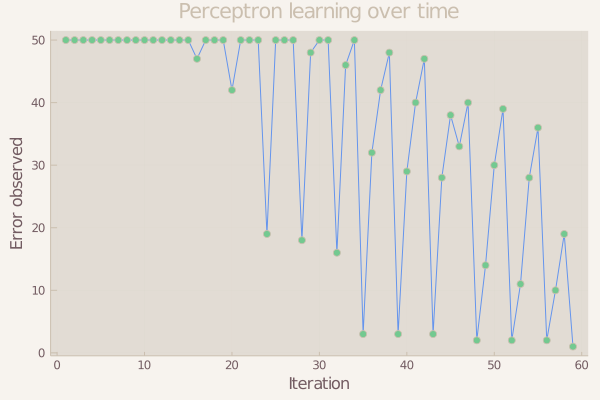

In [47]:
plot(errors,
     xaxis="Iteration",
     yaxis="Error observed",
     title="Perceptron learning over time",
     legend=nothing)

scatter!(errors)

### Recreate the original data scatter plot and add the learned separator line.

### The equation of the line based on the two weights and the bias:

$$ x_2 = \frac{-x_1 * w_1-w_3}{w_3} $$


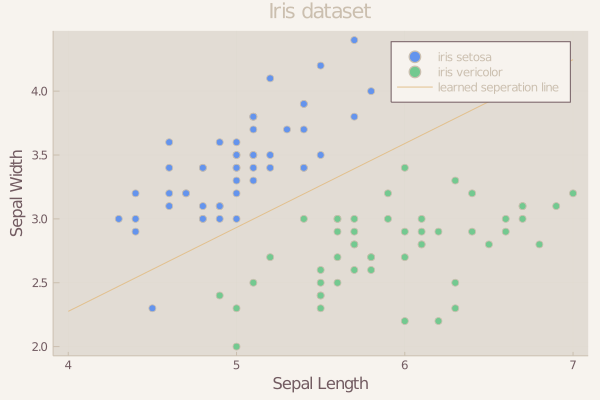

In [48]:
 scatter(x_data[1:50],                         # plot the setosa datapoints and give them a label in the legend
         label = "iris setosa",
         xaxis = "Sepal Length",
         yaxis = "Sepal Width",
         title = "Iris dataset")

 scatter!(x_data[51:100],                      # use the ! to add to the plot the second 50 points of the versicolor
         label = "iris vericolor")

function makeLine(x)
    return((-x*w[1]-w[3])/w[2])
end

plot!(makeLine,4,7, label="learned seperation line")

### To measure how *easy* it was for the perceptron to compute this line, we count the number of iterations it took to get the error to be below the acceptable error amount by taking the size of the array errors.

In [49]:
size(errors)

(59,)

### There are 2 measurements and 2 parts of the flower that can be used for classification.  We can repeat the experiment with other combinations to find the one that has the lowest size of the error array, indicating that it was easier for the perceptron to classify.

### Try Petal Length and Petal Width next...

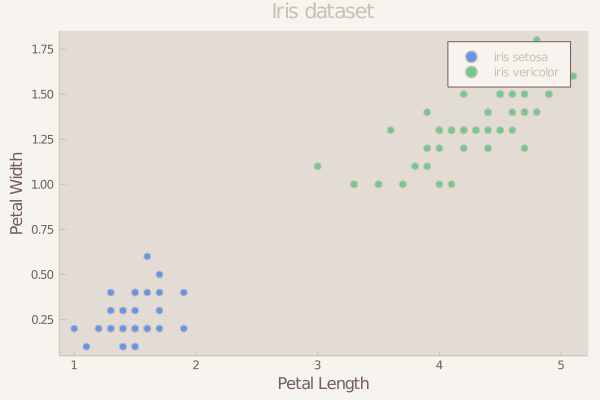

In [50]:
x_data = [x for x in zip(iris.PetalLength[1:100], iris.PetalWidth[1:100])]    # zip returns an array of tuples from multiple iterable ojects
theme(:sand)                               # control the colors of the plot
scatter(x_data[1:50],                         # plot the setosa datapoints and give them a label in the legend
        label = "iris setosa",
        xaxis = "Petal Length",
        yaxis = "Petal Width",
        title = "Iris dataset")

scatter!(x_data[51:100],                      # use the ! to add to the plot the second 50 points of the versicolor
        label = "iris vericolor")

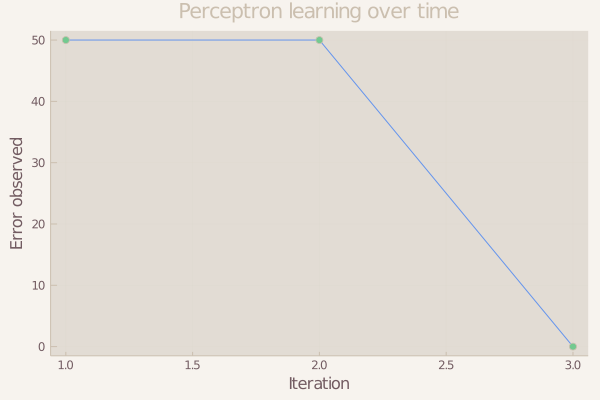

In [51]:
# start the learning algorithm with the initial random weights and a low number for error
w, weights, errors = perceptron_learning_algorithm(wi,x_data,y_data,acceptable_error)
plot(errors,
     xaxis="Iteration",
     yaxis="Error observed",
     title="Perceptron learning over time",
     legend=nothing)
scatter!(errors)

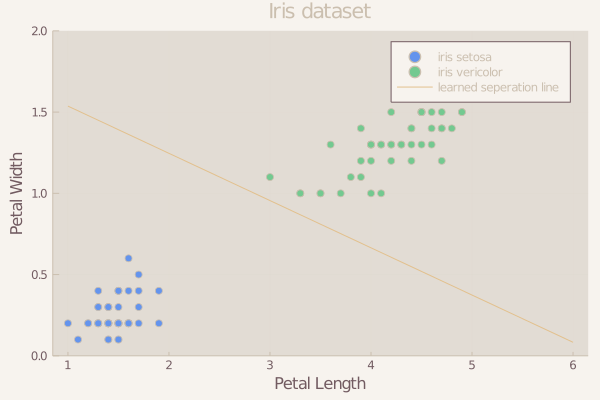

In [52]:
 scatter(x_data[1:50],                         # plot the setosa datapoints and give them a label in the legend
         label = "iris setosa",
         xaxis = "Petal Length",
         yaxis = "Petal Width",
         title = "Iris dataset")

 scatter!(x_data[51:100],                      # use the ! to add to the plot the second 50 points of the versicolor
         label = "iris vericolor")

function makeLine(x)
    return((-x*w[1]-w[3])/w[2])
end

plot!(makeLine,1,6, label="learned seperation line")
ylims!(0,2)

In [53]:
size(errors)

(3,)

### Using the Petal measurements appears to make the classification much easier for the perceptron.  Next, we will compare the lengths of the two parts.

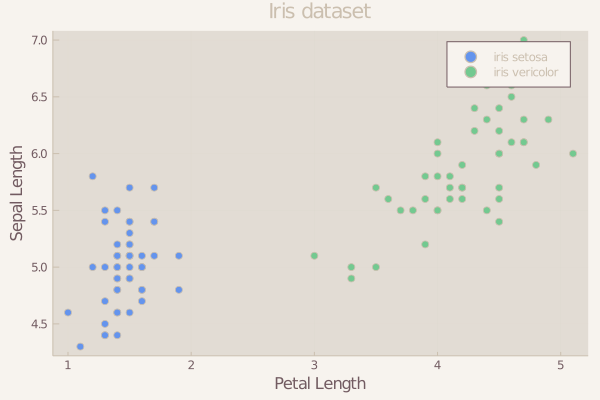

In [54]:
x_data = [x for x in zip(iris.PetalLength[1:100], iris.SepalLength[1:100])]    # zip returns an array of tuples from multiple iterable ojects
theme(:sand)                               # control the colors of the plot
scatter(x_data[1:50],                         # plot the setosa datapoints and give them a label in the legend
        label = "iris setosa",
        xaxis = "Petal Length",
        yaxis = "Sepal Length",
        title = "Iris dataset")

scatter!(x_data[51:100],                      # use the ! to add to the plot the second 50 points of the versicolor
        label = "iris vericolor")

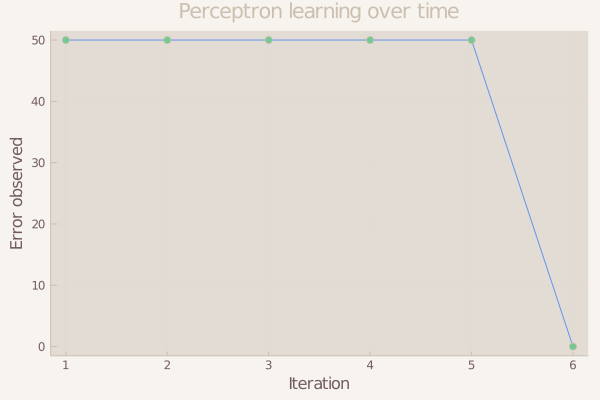

In [55]:
# start the learning algorithm with the initial random weights and a low number for error
w, weights, errors = perceptron_learning_algorithm(wi,x_data,y_data,acceptable_error)
plot(errors,
     xaxis="Iteration",
     yaxis="Error observed",
     title="Perceptron learning over time",
     legend=nothing)
scatter!(errors)

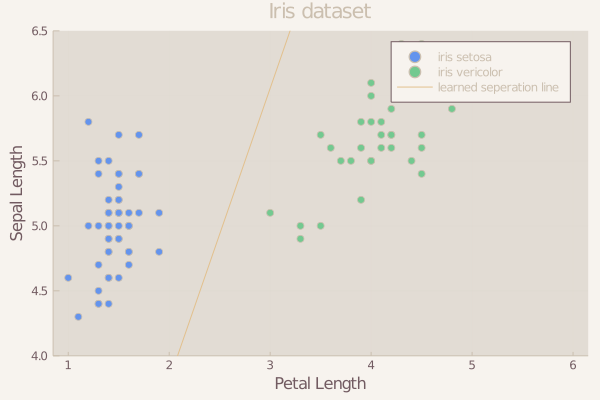

In [56]:
scatter(x_data[1:50],                         # plot the setosa datapoints and give them a label in the legend
        label = "iris setosa",
        xaxis = "Petal Length",
        yaxis = "Sepal Length",
        title = "Iris dataset")

scatter!(x_data[51:100],                      # use the ! to add to the plot the second 50 points of the versicolor
        label = "iris vericolor")

plot!(makeLine,1,6, label="learned seperation line")
ylims!(4,6.5)

In [57]:
size(errors)

(6,)

### We will next compare measuring the two Widths

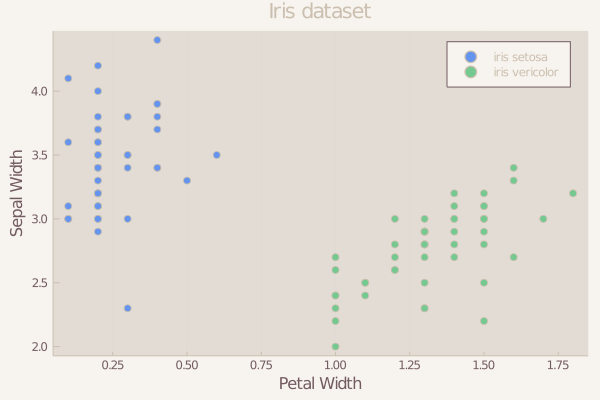

In [58]:
x_data = [x for x in zip(iris.PetalWidth[1:100], iris.SepalWidth[1:100])]    # zip returns an array of tuples from multiple iterable ojects
theme(:sand)                               # control the colors of the plot
scatter(x_data[1:50],                         # plot the setosa datapoints and give them a label in the legend
        label = "iris setosa",
        xaxis = "Petal Width",
        yaxis = "Sepal Width",
        title = "Iris dataset")

scatter!(x_data[51:100],                      # use the ! to add to the plot the second 50 points of the versicolor
        label = "iris vericolor")

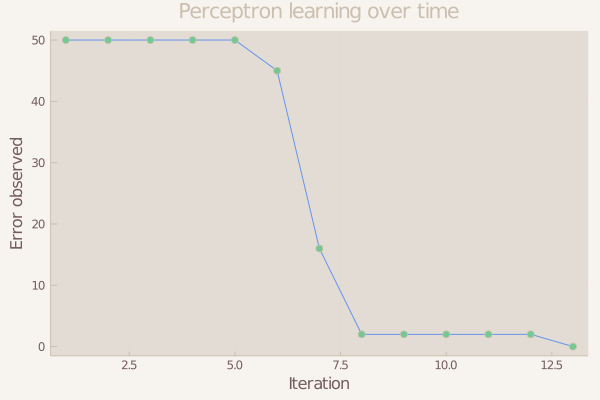

In [59]:
# start the learning algorithm with the initial random weights and a low number for error
w, weights, errors = perceptron_learning_algorithm(wi,x_data,y_data,acceptable_error)
plot(errors,
     xaxis="Iteration",
     yaxis="Error observed",
     title="Perceptron learning over time",
     legend=nothing)
scatter!(errors)

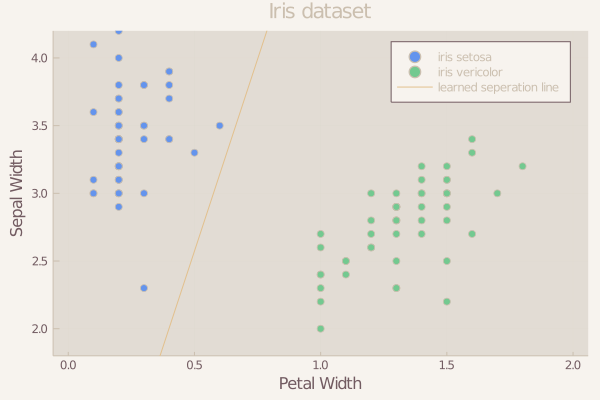

In [60]:
scatter(x_data[1:50],                         # plot the setosa data points and give them a label in the legend
        label = "iris setosa",
        xaxis = "Petal Width",
        yaxis = "Sepal Width",
        title = "Iris dataset")

scatter!(x_data[51:100],                      # use the ! to add to the plot the second 50 points of the versicolor
        label = "iris vericolor")

plot!(makeLine,0,2, label="learned seperation line")
ylims!(1.8,4.2)

In [61]:
size(errors)

(13,)

### Another combination of features is the Petal Length vs the Sepal Width

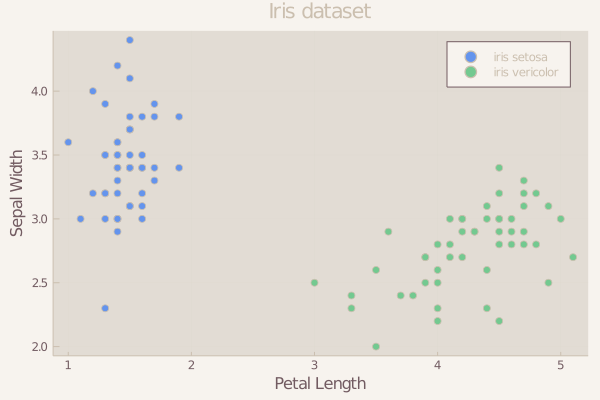

In [62]:
x_data = [x for x in zip(iris.PetalLength[1:100], iris.SepalWidth[1:100])]    # zip returns an array of tuples from multiple iterable ojects
theme(:sand)                               # control the colors of the plot
scatter(x_data[1:50],                         # plot the setosa datapoints and give them a label in the legend
        label = "iris setosa",
        xaxis = "Petal Length",
        yaxis = "Sepal Width",
        title = "Iris dataset")

scatter!(x_data[51:100],                      # use the ! to add to the plot the second 50 points of the versicolor
        label = "iris vericolor")

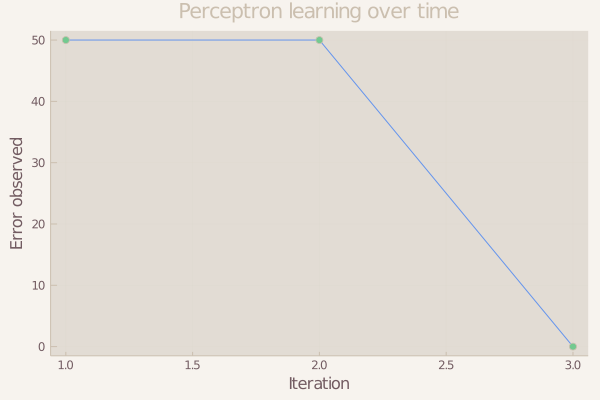

In [63]:
# start the learning algorithm with the initial random weights and a low number for error
w, weights, errors = perceptron_learning_algorithm(wi,x_data,y_data,acceptable_error)
plot(errors,
     xaxis="Iteration",
     yaxis="Error observed",
     title="Perceptron learning over time",
     legend=nothing)
scatter!(errors)

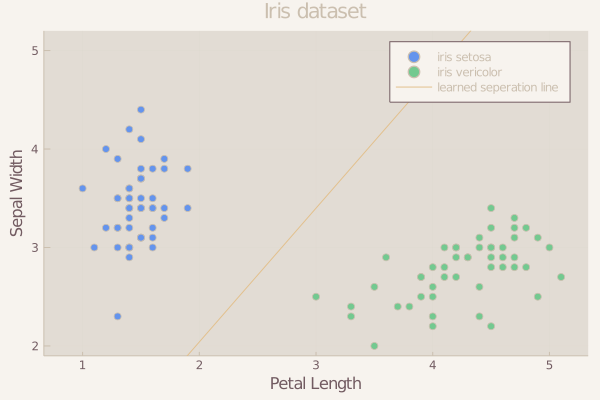

In [64]:
scatter(x_data[1:50],                         # plot the setosa datapoints and give them a label in the legend
        label = "iris setosa",
        xaxis = "Petal Length",
        yaxis = "Sepal Width",
        title = "Iris dataset")

scatter!(x_data[51:100],                      # use the ! to add to the plot the second 50 points of the versicolor
        label = "iris vericolor")

plot!(makeLine,0.8,5.2, label="learned seperation line")
ylims!(1.9,5.2)

In [65]:
size(errors)

(3,)

### The last combination to try is the Petal Width vs the Sepal Length

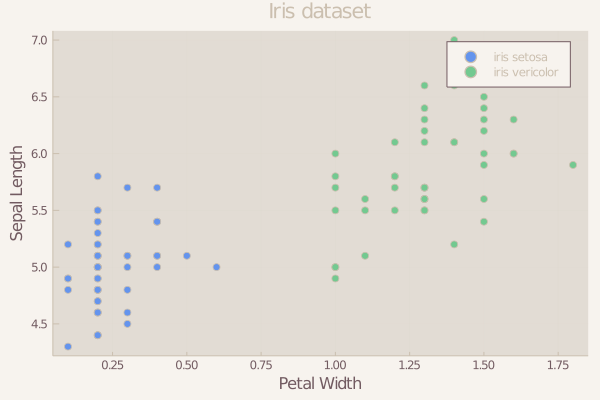

In [66]:
x_data = [x for x in zip(iris.PetalWidth[1:100], iris.SepalLength[1:100])]    # zip returns an array of tuples from multiple iterable ojects
theme(:sand)                               # control the colors of the plot
scatter(x_data[1:50],                         # plot the setosa datapoints and give them a label in the legend
        label = "iris setosa",
        xaxis = "Petal Width",
        yaxis = "Sepal Length",
        title = "Iris dataset")

scatter!(x_data[51:100],                      # use the ! to add to the plot the second 50 points of the versicolor
        label = "iris vericolor")

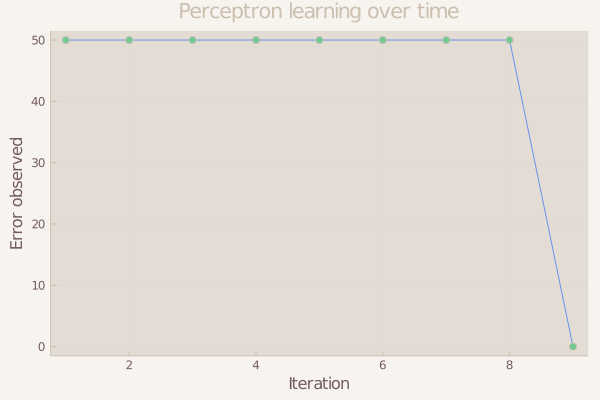

In [67]:
# start the learning algorithm with the initial random weights and a low number for error
w, weights, errors = perceptron_learning_algorithm(wi,x_data,y_data,acceptable_error)
plot(errors,
     xaxis="Iteration",
     yaxis="Error observed",
     title="Perceptron learning over time",
     legend=nothing)
scatter!(errors)

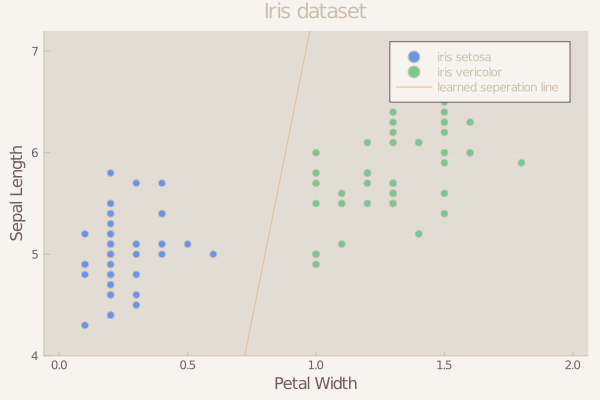

In [68]:
scatter(x_data[1:50],                         # plot the setosa datapoints and give them a label in the legend
        label = "iris setosa",
        xaxis = "Petal Width",
        yaxis = "Sepal Length",
        title = "Iris dataset")

scatter!(x_data[51:100],                      # use the ! to add to the plot the second 50 points of the versicolor
        label = "iris vericolor")

plot!(makeLine,0,2, label="learned seperation line")
ylims!(4,7.2,)

In [69]:
size(errors)

(9,)

---
# Conclusions

### This notebook demonstrated the ability for a perceptron to learn the separation line with labelled data given a maximum error.

### Studying the various combinations of training a perceptron to make a classification for the two species of Iris, some features were observed to be easier for the perceptron to learn the classification line based on the length of the error array which is an indication of the number of iterations it took to reach the acceptable error count before stopping.  The two features that **consistently** took the most iterations, and so were the most difficult to classify using the perceptron are the **Sepal Length and Sepal Width**.

### This result was related to the initial weights that were assigned randomly.  These random weights may have already been correctly classifying some of the features before training, giving some features an unfair *head start* while also making it more difficult for some of the other features.  To make it a more fair comparison, re-running the simulation multiple times to see which combination performs best on average.
---